In [82]:
import numpy as np
from scipy.integrate import solve_ivp
from dataclasses import dataclass
import matplotlib.pyplot as plt

In [83]:
def sigmoid(x):
    if not hasattr(x, '__iter__'):
        x = (x,)
    n = 500
    return [np.sign(xi) if np.abs(xi) >= 1 else 2.0/(1.0+np.exp(-2*n*xi/(1-xi*xi)))-1 for xi in x]

def dqdt(t, q, p):  
    phi  = q[0]
    dphi = q[1]
    d2phi = - (p.m*p.g*p.l/p.J)*np.sin(phi) - p.M*np.sign(dphi)/p.J
    return np.hstack([dphi,d2phi])

sigmoid(0.001)

[0.4621175504841788]

In [84]:
@dataclass
class Data:
    # Масса маятника
    m : float = 100;
    # Расстояние от точки подвески до центра масс (от оси вращения)
    l : float = 0.5;
    # Момент инерции маятника относительно оси вращения
    J : float =  100*0.5**2/3    
    # Момент сопротивления
    M : float = 3
    # Ускорение свободного падения
    g : float = 9.807

# Создаем экземпляр класса Data (объект)
p = Data()

In [85]:
q0 = [np.deg2rad(20),0]
sol = solve_ivp(lambda t,q: dqdt(t,q,p), [0,13], q0, method='RK45', rtol = 1e-8)

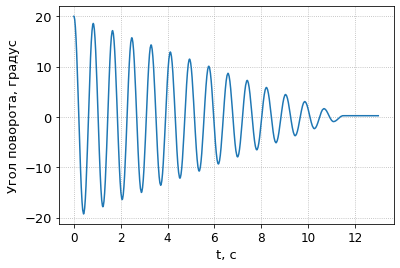

In [89]:
plt.plot(sol.t,np.rad2deg(sol.y[0]))
plt.grid(ls=':')
plt.xlabel('t, c')
plt.ylabel('Угол поворота, градус');
plt.savefig('pendulum-phi.svg')

In [94]:
np.sqrt(p.m*p.g*p.l*p.J)*np.pi*q0[0]/(2*11.5)

3.047837910536908

In [93]:
(3.07-3)/3

0.02333333333333328